# Generator's hyperparameters tuning

In [1]:
import sys

from importlib_metadata import distributions

sys.path.append('..')
from grail_metabolism.utils.optuna import OptunaWrapper
from grail_metabolism.utils.preparation import MolFrame, rules

ATTENTION: RXNMapper is not installed. Please install it first if you want to create your own set of rules.
ATTENTION: you use incorrect for rxnmapper version of rdkit


In [2]:
tune = OptunaWrapper()

### val_frame

Here we will only optimize huber loss value on the validation set

In [4]:
val_triples = MolFrame.read_triples('../grail_metabolism/data/val_triples.txt')
val_frame = MolFrame.from_file('../grail_metabolism/data/val.sdf', val_triples, standartize=False)

Processing reactions:   0%|          | 0/1061 [00:00<?, ?it/s]

In [5]:
with open('../grail_metabolism/data/smirks.txt') as f:
    rules = f.read().splitlines()

### val_frame setup

In [ ]:
val_frame.negatives()
val_frame.morganize()
val_frame.singlegraphs()
val_frame.label_reactions(rules)

In [7]:
from grail_metabolism.utils.transform import from_rule
from tqdm.auto import tqdm

In [8]:
rule_dict = {rule: from_rule(rule) for rule in tqdm(rules)}

  0%|          | 0/474 [00:00<?, ?it/s]

In [18]:
val_frame.reaction_labels['CN(C)N=O'] = [0] * 474

### make study

In [ ]:
tune.make_study(val_frame, val_frame, 'generator', rule_dict=rule_dict)

In [34]:
from optuna.visualization.matplotlib import plot_optimization_history

<Axes: title={'center': 'Optimization History Plot'}, xlabel='#Trials', ylabel='Objective Value'>

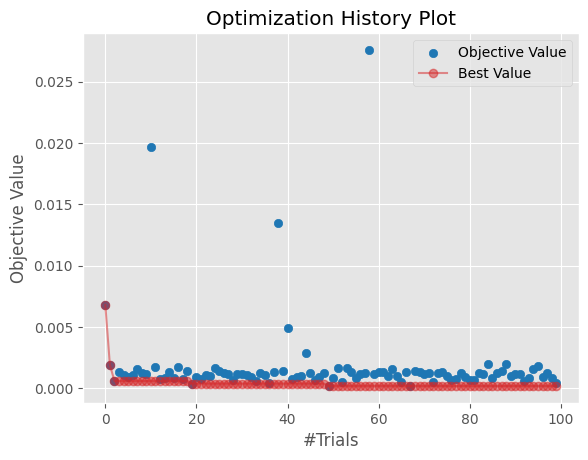

In [36]:
plot_optimization_history(tune.study)

In [ ]:
!pip install optuna_fast_fanova

In [58]:
import optuna
from optuna_fast_fanova import FanovaImportanceEvaluator

importance = optuna.importance.get_param_importances(
        tune.study, evaluator=FanovaImportanceEvaluator()
    )

In [60]:
import seaborn as sns

<Axes: >

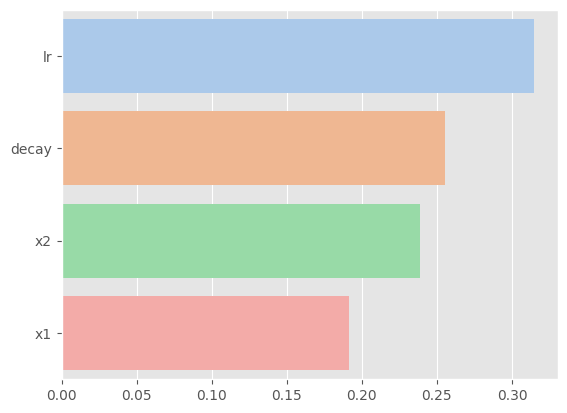

In [64]:
sns.barplot(
    importance, palette='pastel', orient='h'
)